<a href="https://colab.research.google.com/github/nithishpatel/Stock-market-analysis/blob/main/Final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import datetime as dt
import math 
import statsmodels.api as sm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df= pd.read_csv('tata.csv')

In [3]:
df= df.iloc[::10,1:8]

In [6]:
df.head(10)

,date,time,Open,High,Low,Close,Volume
0,24-06-2013,9:20,270.30,270.4,270.10,270.20,30794
10,24-06-2013,9:30,271.95,272.6,271.90,272.50,32683
20,24-06-2013,9:40,272.25,272.7,272.25,272.60,11347
30,24-06-2013,9:50,274.35,274.6,273.75,273.90,24191
40,24-06-2013,10:00,273.50,273.7,273.40,273.50,7056
50,24-06-2013,10:10,273.65,273.9,273.55,273.85,13327
60,24-06-2013,10:20,273.70,273.8,273.50,273.70,11014
70,24-06-2013,10:30,273.15,273.5,273.10,273.50,4747
80,24-06-2013,10:40,273.15,273.4,272.85,272.85,9756
90,24-06-2013,10:50,274.25,274.9,274.25,274.75,22202


<BarContainer object of 37 artists>

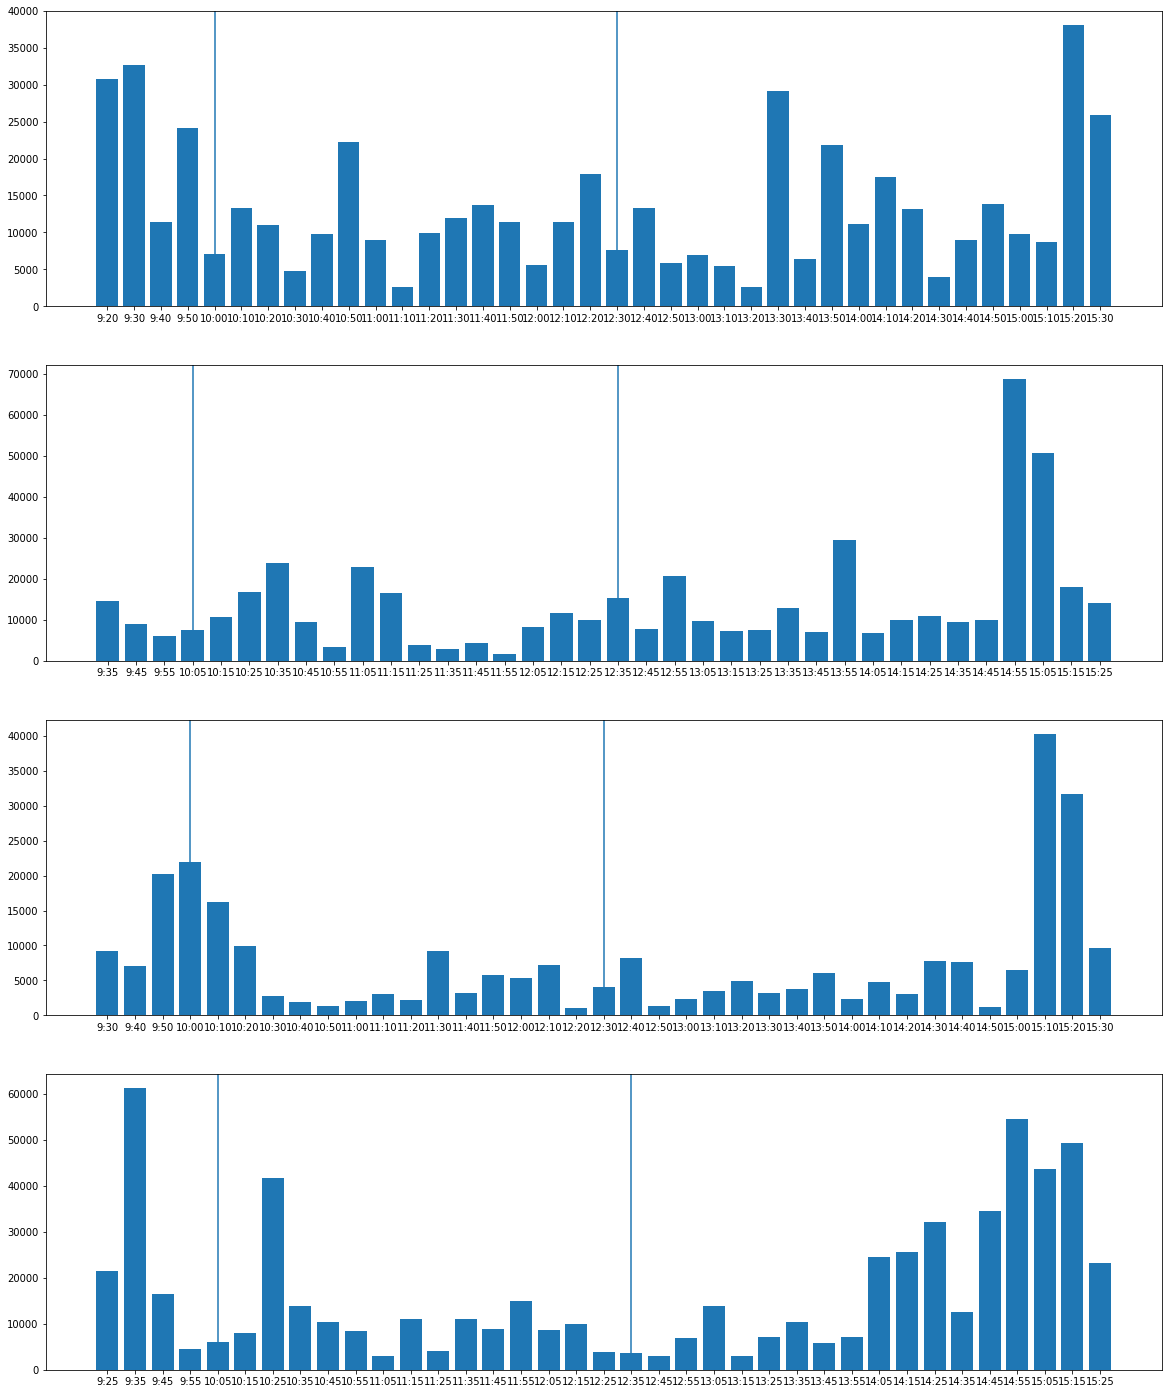

In [5]:
plt.figure(figsize=(20,25))
vol=df.iloc[0:38,6]
time=df.iloc[0:38,1]
plt.subplot(411)
plt.axvline(x=4)
plt.axvline(x=19)
plt.bar(time,vol)
vol=df.iloc[39:75,6]
time=df.iloc[39:75,1]
plt.subplot(412)
plt.axvline(x=3)
plt.axvline(x=18)
plt.bar(time,vol)
vol=df.iloc[76:113,6]
time=df.iloc[76:113,1]
plt.subplot(413)
plt.axvline(x=3)
plt.axvline(x=18)
plt.bar(time,vol)
vol=df.iloc[113:150,6]
time=df.iloc[113:150,1]
plt.subplot(414)
plt.axvline(x=4)
plt.axvline(x=19)
plt.bar(time,vol)

## Calculating average values for day Low and High values

In [7]:
avg1=df['Low']
avg2=df['High']
avg3=(avg1+avg2)/2
avg=pd.DataFrame(avg3)
df['Average']= avg.round(2)

In [8]:
volumes=df['Volume']
volumes=pd.DataFrame(volumes)
times=df['time']
times=pd.DataFrame(times)

In [9]:
volumes=volumes.iloc[:38,:]
times=times.iloc[:38,:]
volumes=volumes.astype(str)
times=times.astype(str)

In [11]:
df.head(10)

,date,time,Open,High,Low,Close,Volume,Average
0,24-06-2013,9:20,270.30,270.4,270.10,270.20,30794,270.25
10,24-06-2013,9:30,271.95,272.6,271.90,272.50,32683,272.25
20,24-06-2013,9:40,272.25,272.7,272.25,272.60,11347,272.48
30,24-06-2013,9:50,274.35,274.6,273.75,273.90,24191,274.18
40,24-06-2013,10:00,273.50,273.7,273.40,273.50,7056,273.55
50,24-06-2013,10:10,273.65,273.9,273.55,273.85,13327,273.73
60,24-06-2013,10:20,273.70,273.8,273.50,273.70,11014,273.65
70,24-06-2013,10:30,273.15,273.5,273.10,273.50,4747,273.30
80,24-06-2013,10:40,273.15,273.4,272.85,272.85,9756,273.12
90,24-06-2013,10:50,274.25,274.9,274.25,274.75,22202,274.58


In [ ]:
df=df.drop(['Open','High','Low', 'Close','Volume'], axis=1)

In [ ]:
dates=pd.DataFrame(df['date'])

In [ ]:
dates=dates.values
x= df.values

In [ ]:
h=df['date'].unique()
unidays=pd.DataFrame(h)
unidays=unidays.values

# Generating Graph for a specified day 

In [ ]:
temp =[]
j=int(input())
for i in range(23082):
  if np.array_equal(unidays[j],dates[i])==True:
    y= x[i]
    temp.append(y)

5


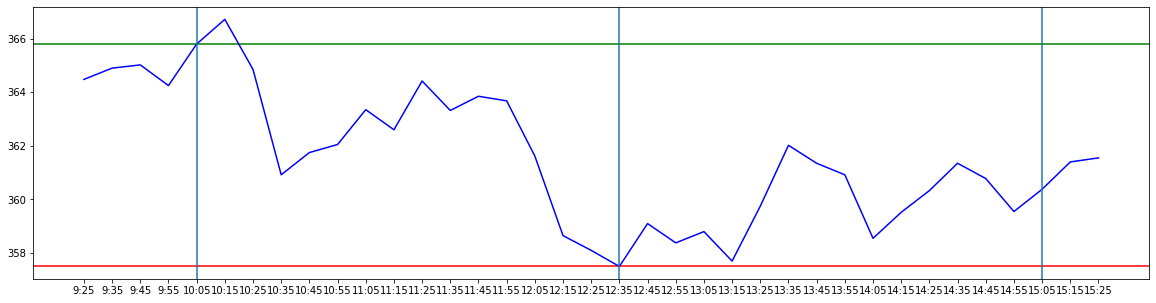

In [ ]:
day1= pd.DataFrame(temp)
avg_var=day1.iloc[:,2]
time=day1.iloc[:,1]
plt.figure(figsize=(20,5))
plt.axhline(y=avg_var[4],color='g')
plt.axhline(y=avg_var[19],color='r')
plt.plot(time,avg_var, color='blue', label='Tata Steel')
plt.axvline(x=4)
plt.axvline(x=19)
plt.axvline(x=34)

## Calculating Percentage change for the mid day of the data ie 10am to 12:30pm

In [ ]:
per_c=[]
per_main=[]
df2=[]
for j in range(616):
  for i in range(23082):
    if unidays[j]==dates[i]:
      per_main.append(x[i][2])
    else:
      continue
  per_c=float(((per_main[4]-per_main[19])/per_main[4])*100)
  df2.append(per_c)
  per_main=[0]

## Calculating Percentage change for the whole day

In [ ]:
per_c2=[]
per_main2=[]
df3=[]
for j in range(616):
  for i in range(23082):
    if unidays[j]==dates[i]:
      per_main2.append(x[i][2])
    else:
      continue
  per_c2=float(((per_main2[1]-per_main2[-3])/per_main2[1])*100)
  df3.append(per_c2)
  per_main2=[0]

In [ ]:
df2=pd.DataFrame(df2)
df2=df2.values
df3=pd.DataFrame(df3)
df3=df3.values
df2=df2.round(2)
df3=df3.round(2)

Here trend is represented as

**0: Neutral**

**1: Bearish**

**2:Bullish**

**3:Very Bearish**

**4:Very Bullish**


In [ ]:
trend=[]
n=[]
a=1.0
b=2.0
c=-1.0
d=-2.0
e=-6.0
f=6.0
for i in range(616):
  if df2[i]<=a and df2[i]>c:
    trend.append(0)
    n.append(df2[i])
    
  elif df2[i]<=b and df2[i]>a:
    trend.append(1)
    n.append(df2[i])
  elif df2[i]<=c and df2[i]>d:
    trend.append(2)
    n.append(df2[i])
  elif df2[i]<=d and df2[i]>=e:
    trend.append(3)
    n.append(df2[i])
  elif df2[i]<=f and df2[i]>b:
    trend.append(4)
    n.append(df2[i])

In [ ]:
act_trend=[]
n=[]
a=1.0
b=2.0
c=-1.0
d=-2.0
e=-100.0
f=100.0
for i in range(616):
  if df3[i]<=a and df3[i]>c:
    act_trend.append(0)
    n.append(df3[i])
    
  elif df3[i]<=b and df3[i]>a:
    act_trend.append(1)
    n.append(df3[i])
  elif df3[i]<=c and df3[i]>d:
    act_trend.append(2)
    n.append(df3[i])
  elif df3[i]<=d and df3[i]>=e:
    act_trend.append(3)
    n.append(df3[i])
  elif df3[i]<=f and df3[i]>b:
    act_trend.append(4)
    n.append(df3[i])

In [ ]:
trend=pd.DataFrame(trend)
act_trend=pd.DataFrame(act_trend)
df2= pd.DataFrame(df2)
unidays= pd.DataFrame(unidays)


# creating data_frame to train the model



In [ ]:
input_df= pd.DataFrame() 

input_df['Per_change']=df2.iloc[:,0]
input_df['Day_change']=df3
input_df['Trend']= trend.iloc[:,0]
input_df['act_trend']=act_trend

In [ ]:
input_df.head()

,Per_change,Day_change,Trend,act_trend
0,0.98,1.58,0,1
1,0.82,1.17,0,1
2,1.58,2.52,1,4
3,0.08,-1.41,0,2
4,-0.62,-4.04,0,3


In [ ]:
X=input_df.iloc[:,0:3]
Y=input_df.iloc[:,3]

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.4,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)      

In [ ]:
from sklearn.svm import SVR
classifier = SVR(kernel='rbf')  
classifier.fit(X_train, Y_train) 
classifier.score(X_test,Y_test).round(2)

0.85

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=1500).fit(X_train, Y_train)
regr.score(X_test,Y_test).round(2)

0.88

Text(0, 0.5, 'Trend')

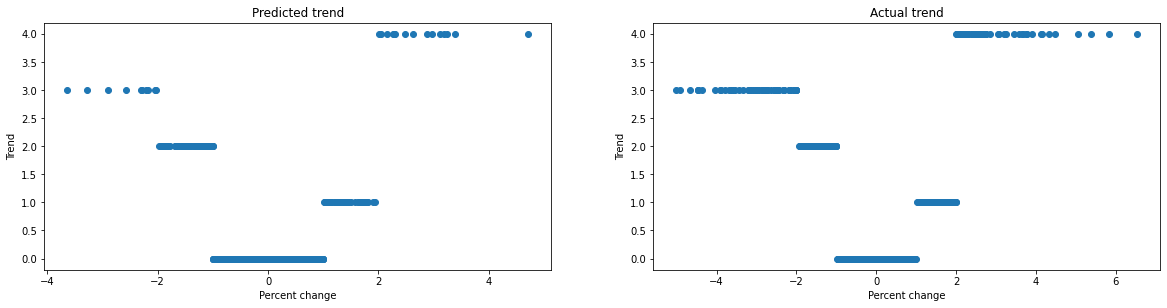

In [ ]:
df2=pd.DataFrame(df2)
df2=df2.values
trend=pd.DataFrame(trend)
trend=trend.values
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('Predicted trend')
plt.xlabel('Percent change')
plt.ylabel('Trend')
plt.scatter(df2,trend)
plt.subplot(2,2,2)
plt.scatter(df3,act_trend)
plt.title('Actual trend')
plt.xlabel('Percent change')
plt.ylabel('Trend')

Here trend is represented as

**0: Neutral**

**1: Bearish**

**2:Bullish**

**3:Very Bearish**

**4:Very Bullish**